# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Libraries

In [1]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

### Data import

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData.shape

(7043, 16)

### Data info

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

### Changing column type

In [5]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### Null values

In [7]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
churnData['TotalCharges'].mean()

2283.3004408418656

In [9]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean())

In [10]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### X-y-split

In [11]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

### Train-test-split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression model

In [13]:
def regression_model(X_train, y_train, X_test, y_test, w):
    regression = LogisticRegression(random_state=13, max_iter=500, class_weight=w) 
    regression.fit(X_train, y_train)
    
    score_reg = regression.score(X_test, y_test)
    
    predictions = regression.predict(X_test)
    value_cnt_reg = pd.Series(predictions).value_counts()
    
    print('The accuracy score is: ', score_reg, '\n')
    print('The value counts of the model predictions are: ', '\n', value_cnt_reg) 

In [14]:
def metrics_regression(X_train, y_train, X_test, y_test, w):
    
    regression = LogisticRegression(random_state=13, max_iter=500, class_weight=w) 
    regression.fit(X_train, y_train)
    
    predictions = regression.predict(X_test)
    
    #confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A',
                   'False B', 'True B']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    print('Confusion matrix:')
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    
    
    #classification report
    metrics_reg = metrics.classification_report(y_test, predictions)
    print('Regression report:', '\n')
    print(metrics_reg)  

In [15]:
regression_model(X_train, y_train, X_test, y_test, w=None)

The accuracy score is:  0.8105039034776437 

The value counts of the model predictions are:  
 No     1167
Yes     242
dtype: int64


Confusion matrix:
Regression report: 

              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1036
         Yes       0.72      0.47      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



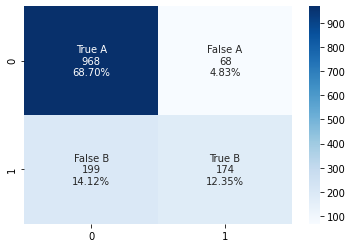

In [16]:
metrics_regression(X_train, y_train, X_test, y_test, w=None)

### Decision Tree Model

In [17]:
def tree_model(X_train, y_train, X_test, y_test):
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    score_tree = tree.score(X_test, y_test)
    
    predictions = tree.predict(X_test)
    value_cnt_tree = pd.Series(predictions).value_counts()
    
    print('The accuracy score is: ', score_tree, '\n')
    print('The value counts of the model predictions are: ', '\n', value_cnt_tree) 

In [18]:
def metrics_tree(X_train, y_train, X_test, y_test):
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    predictions = tree.predict(X_test)
    
    #confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A',
                   'False B', 'True B']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    print('Confusion matrix:')
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    
    
    #classification report
    metrics_tree = metrics.classification_report(y_test, predictions)
    print('Decision tree report:', '\n')
    print(metrics_tree)  

In [19]:
tree_model(X_train, y_train, X_test, y_test)

The accuracy score is:  0.7324343506032647 

The value counts of the model predictions are:  
 No     1021
Yes     388
dtype: int64


Confusion matrix:
Decision tree report: 

              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1036
         Yes       0.50      0.50      0.50       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



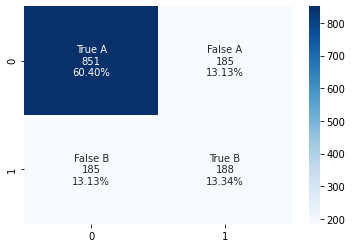

In [20]:
metrics_tree(X_train, y_train, X_test, y_test)

## Balancing imbalance of the data

### SMOTE

In [21]:
X_train_sm = X_train.copy()
y_train_sm = y_train.copy()

In [22]:
smote = SMOTE()

X_train_sm, y_train_sm = smote.fit_resample(X_train_sm, y_train_sm)
y_train_sm.value_counts()

No     4138
Yes    4138
Name: Churn, dtype: int64

#### Logistic Regression

In [24]:
regression_model(X_train_sm, y_train_sm, X_test, y_test, w=None)

The accuracy score is:  0.7154009936124911 

The value counts of the model predictions are:  
 No     767
Yes    642
dtype: int64


Confusion matrix:
Regression report: 

              precision    recall  f1-score   support

          No       0.91      0.68      0.78      1036
         Yes       0.48      0.82      0.60       373

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.73      1409



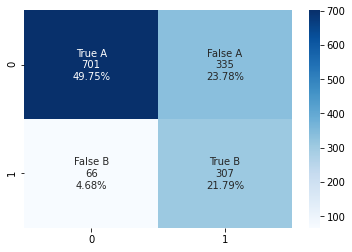

In [25]:
metrics_regression(X_train_sm, y_train_sm, X_test, y_test, w=None)

#### Decision tree

In [26]:
tree_model(X_train_sm, y_train_sm, X_test, y_test)

The accuracy score is:  0.709013484740951 

The value counts of the model predictions are:  
 No     924
Yes    485
dtype: int64


Confusion matrix:
Decision tree report: 

              precision    recall  f1-score   support

          No       0.84      0.75      0.79      1036
         Yes       0.46      0.59      0.52       373

    accuracy                           0.71      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.71      0.72      1409



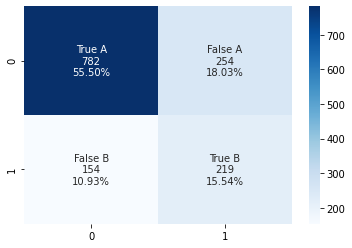

In [27]:
metrics_tree(X_train_sm, y_train_sm, X_test, y_test)

### Tomeklinks

In [28]:
X_train_tl = X_train.copy()
y_train_tl = y_train.copy()

In [29]:
tl = TomekLinks('majority')

X_train_tl, y_train_tl = tl.fit_resample(X_train_tl, y_train_tl)

#### Logistic regression

In [30]:
regression_model(X_train_tl, y_train_tl, X_test, y_test, w=None)

The accuracy score is:  0.7913413768630234 

The value counts of the model predictions are:  
 No     1072
Yes     337
dtype: int64


Confusion matrix:
Regression report: 

              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1036
         Yes       0.62      0.56      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



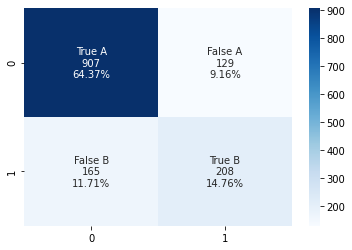

In [31]:
metrics_regression(X_train_tl, y_train_tl, X_test, y_test, w=None)

#### Decision tree

In [34]:
tree_model(X_train_tl, y_train_tl, X_test, y_test)

The accuracy score is:  0.7246273953158269 

The value counts of the model predictions are:  
 No     974
Yes    435
dtype: int64


Confusion matrix:
Decision tree report: 

              precision    recall  f1-score   support

          No       0.83      0.79      0.81      1036
         Yes       0.49      0.55      0.52       373

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.74      0.73      0.73      1409



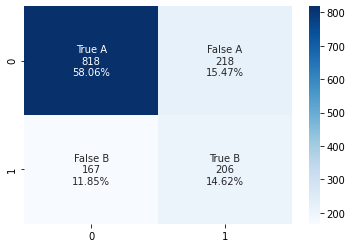

In [39]:
metrics_tree(X_train_tl, y_train_tl, X_test, y_test)

### Conclusion

- accuracy scores are better for Logistic Regression than for Decision Tree
- F1 scores are better for Logistic Regression than for Decision Tree for all different scenarios (before/after SMOTE/Tomeklinks)